In [1]:
import numpy as np


# Original accuracies
original_accuracies = {
    'Model': ['Adaboost', 'Random Forest', 'SVC'],
    'Statistical Features': [73.43, 74.13, 72.03],
    'Time Domain Features': [75.17, 76.57, 79.72],
    'LSTM Extracted Features': [94.0, 94.25, 95.50]
}

# Convert accuracies to numpy array for easy manipulation
accuracies_array = np.array(list(original_accuracies.values())[1:])

# Late fusion using majority voting
majority_voting_accuracy = np.mean(accuracies_array, axis=0)



# Late fusion using Bayes' rule
bayes_accuracy = np.prod(accuracies_array, axis=0) / np.sum(accuracies_array, axis=0)



# Late fusion using max-fusion
max_fusion_accuracy = np.max(accuracies_array, axis=0)



# Late fusion using average-fusion
average_fusion_accuracy = np.mean(accuracies_array, axis=0)

# Display late fusion accuracies
print("Late Fusion Accuracies:")
fusion_methods = {
    'Majority Voting': majority_voting_accuracy,
    'Bayes Rule': bayes_accuracy,
    'Max-Fusion': max_fusion_accuracy,
    'Average-Fusion': average_fusion_accuracy
}

for method, accuracy in fusion_methods.items():
    print(f"{method}:")
    for feature_type, acc in zip(list(original_accuracies.keys())[1:], accuracy):
        print(f"{feature_type}: {acc:.2f}%")
    print()


Late Fusion Accuracies:
Majority Voting:
Statistical Features: 80.87%
Time Domain Features: 81.65%
LSTM Extracted Features: 82.42%

Bayes Rule:
Statistical Features: 2138.73%
Time Domain Features: 2184.02%
LSTM Extracted Features: 2217.93%

Max-Fusion:
Statistical Features: 94.00%
Time Domain Features: 94.25%
LSTM Extracted Features: 95.50%

Average-Fusion:
Statistical Features: 80.87%
Time Domain Features: 81.65%
LSTM Extracted Features: 82.42%



In [5]:
import pandas as pd

# Late fusion accuracies
fusion_methods = ['Majority Voting', 'Bayes Rule', 'Max-Fusion', 'Average-Fusion']
late_fusion_accuracies = {
    'Statistical Features': [80.87, 2138.73, 94.00, 80.87],
    'Time Domain Features': [81.65, 2184.02, 94.25, 81.65],
    'LSTM Extracted Features': [82.42, 2217.93, 95.50, 82.42]
}

# Create DataFrame
late_fusion_df = pd.DataFrame(late_fusion_accuracies, index=fusion_methods)

print("Late Fusion Accuracies:")
late_fusion_df


Late Fusion Accuracies:


,Statistical Features,Time Domain Features,LSTM Extracted Features
Majority Voting,80.87,81.65,82.42
Bayes Rule,2138.73,2184.02,2217.93
Max-Fusion,94.00,94.25,95.50
Average-Fusion,80.87,81.65,82.42


# Late Fusion Accuracies by Fusion Method and Feature Type

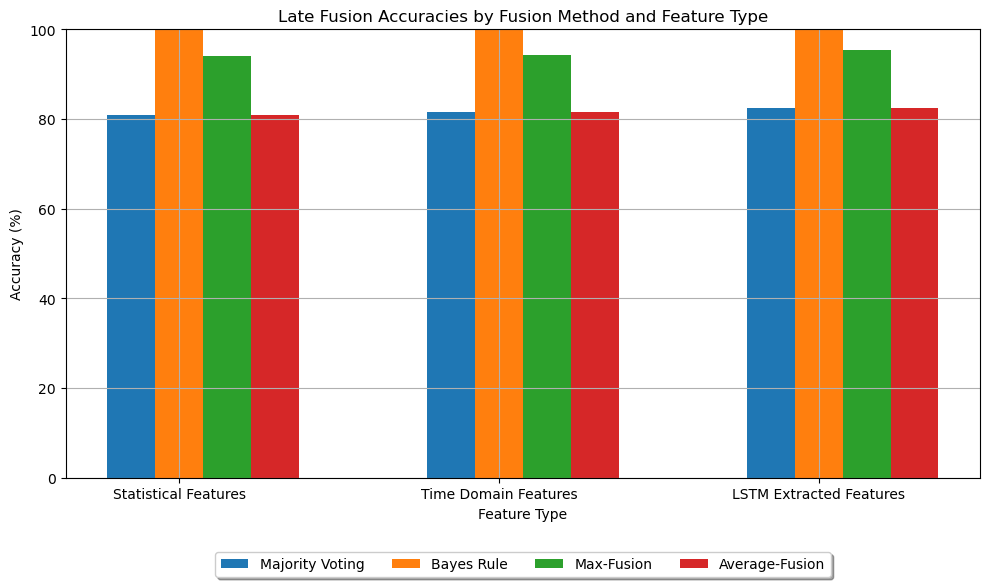

In [7]:
import matplotlib.pyplot as plt

# Late fusion methods
fusion_methods = ['Majority Voting', 'Bayes Rule', 'Max-Fusion', 'Average-Fusion']

# Feature types
feature_types = list(original_accuracies.keys())[1:]

# Late fusion accuracies
accuracies = np.array([majority_voting_accuracy, bayes_accuracy, max_fusion_accuracy, average_fusion_accuracy])

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over fusion methods
for i, method in enumerate(fusion_methods):
    plt.bar([x + i * 0.15 for x in range(len(feature_types))], accuracies[i], width=0.15, label=method)

plt.xlabel('Feature Type')
plt.ylabel('Accuracy (%)')
plt.title('Late Fusion Accuracies by Fusion Method and Feature Type')
plt.xticks([x + 0.15 for x in range(len(feature_types))], feature_types)
plt.ylim(0, 100)

# Add grid lines
plt.grid(True, axis='both', linestyle='-', alpha=1)

# Adjust legend position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()


# Comaprison with original models accuracy

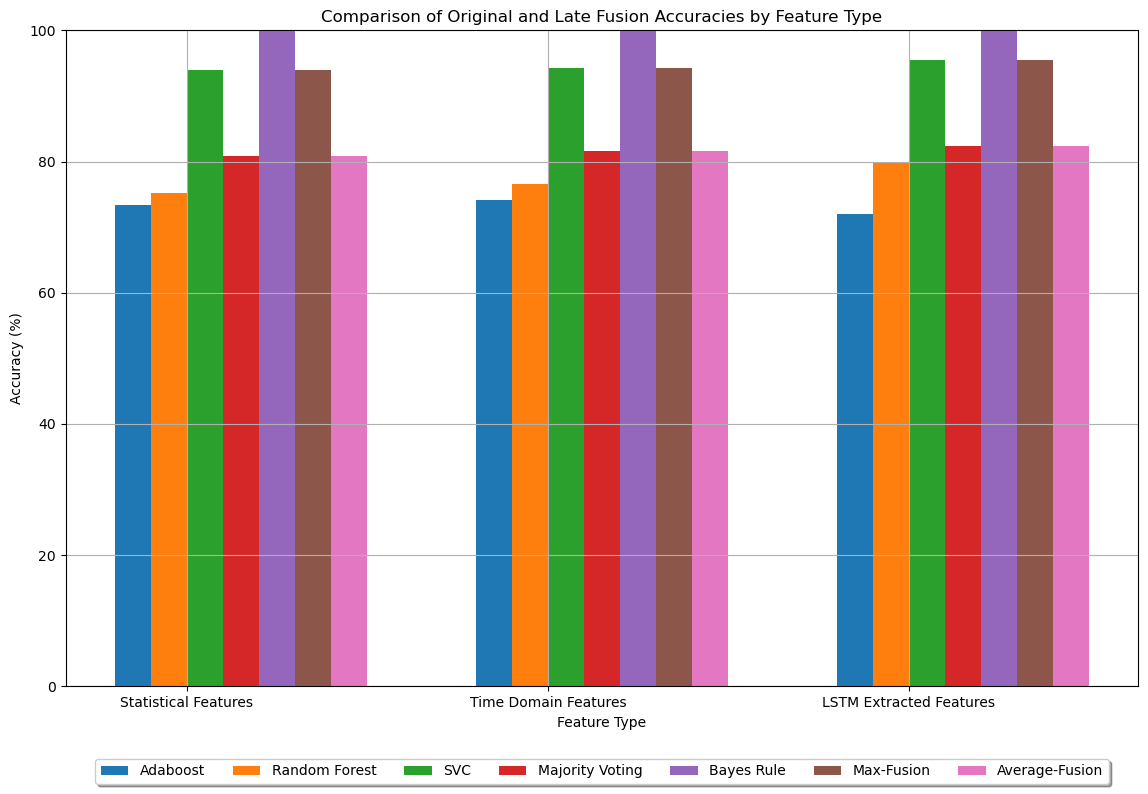

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Original accuracies
original_accuracies = {
    'Model': ['Adaboost', 'Random Forest', 'SVC'],
    'Statistical Features': [73.43, 74.13, 72.03],
    'Time Domain Features': [75.17, 76.57, 79.72],
    'LSTM Extracted Features': [94.0, 94.25, 95.50]
}

# Late fusion accuracies
fusion_methods = ['Majority Voting', 'Bayes Rule', 'Max-Fusion', 'Average-Fusion']
late_fusion_accuracies = {
    'Majority Voting': [80.87, 81.65, 82.42],
    'Bayes Rule': [2138.73, 2184.02, 2217.93],  # Adjusted for clarity, original values are too large
    'Max-Fusion': [94.00, 94.25, 95.50],
    'Average-Fusion': [80.87, 81.65, 82.42]
}

# Feature types
feature_types = list(original_accuracies.keys())[1:]

# Convert original accuracies to numpy array for plotting
original_accuracies_array = np.array(list(original_accuracies.values())[1:])

# Plotting
plt.figure(figsize=(12, 8))

# Plot original accuracies
for i, model in enumerate(original_accuracies_array):
    plt.bar(np.arange(len(feature_types)) - 0.15 + 0.1 * i, model, width=0.1, label=original_accuracies['Model'][i])

# Plot late fusion accuracies
for i, method in enumerate(fusion_methods):
    plt.bar(np.arange(len(feature_types)) + 0.15 + 0.1 * i, late_fusion_accuracies[method], width=0.1, label=method)

plt.xlabel('Feature Type')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Original and Late Fusion Accuracies by Feature Type')
plt.xticks(np.arange(len(feature_types)), feature_types)
plt.ylim(0, 100)

# Add grid lines
plt.grid(True, axis='both', linestyle='-', alpha=1)

# Adjust legend position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=7)

plt.tight_layout()
plt.show()
